In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Dataset

In [38]:
DATA_PATH = '/content/drive/MyDrive/SVM/data/Iris.csv'

## Data Preprocessing
A pairplot is used to look at the bivariate relationship between each feature. SVM is a binary classification algorithm, so we can check these plots to select the features that show 2 distinct classes. We will use SepalLengthCm and PetalWidthCm to classify setosa and versicolor.

In [39]:
dataset = pd.read_csv(DATA_PATH)
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


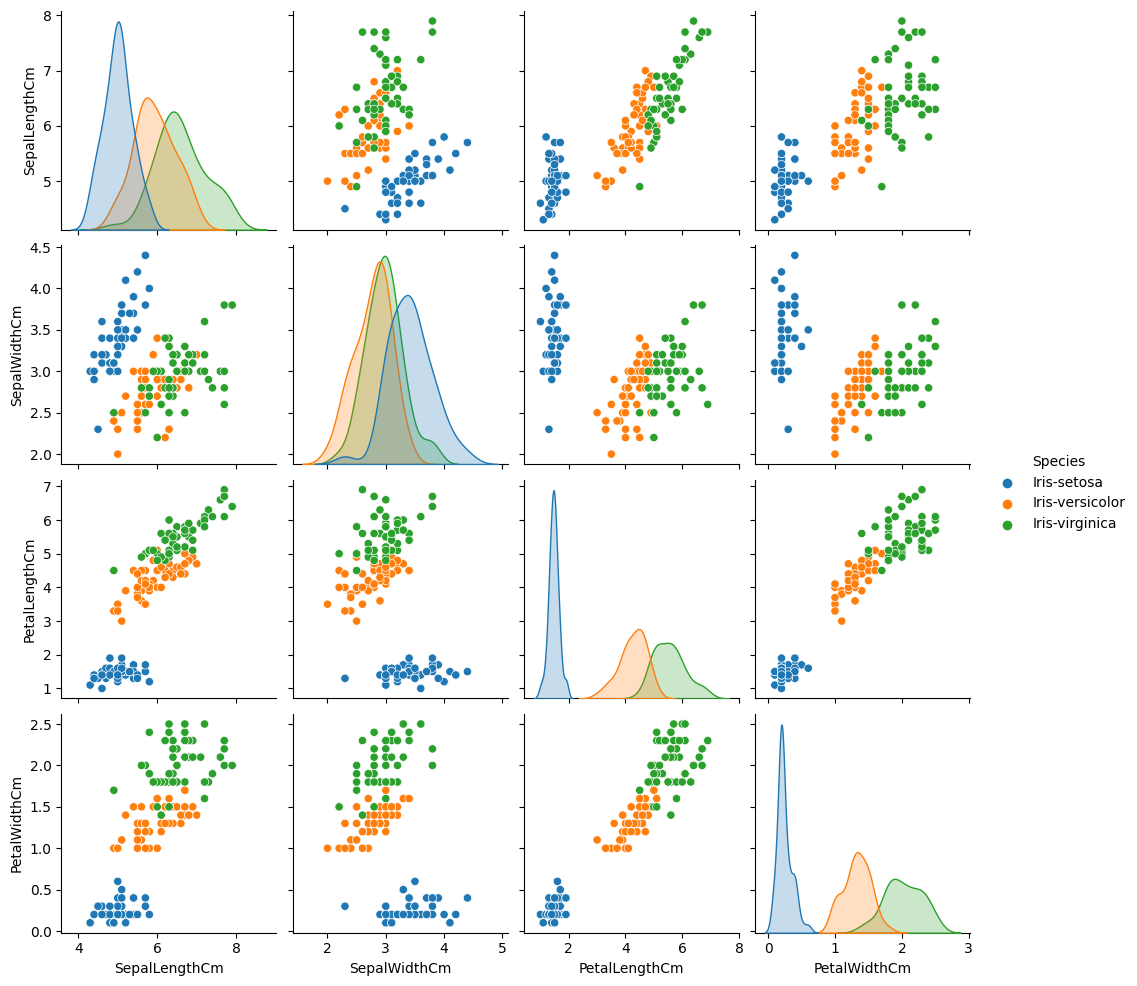

In [40]:
sns.pairplot(data=dataset, hue='Species', vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], kind='scatter')

Extract the features and classes that we want to use:
- features:
  - SepalLengthCm
  - PetalWidthCm
- classes:
  - Iris-setosa
  - Iris-versicolor

In [41]:
dataset = dataset.loc[dataset['Species'].isin(['Iris-setosa', 'Iris-versicolor']), ['SepalLengthCm', 'PetalWidthCm', 'Species']]
dataset

,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa
...,...,...,...
95,5.7,1.2,Iris-versicolor
96,5.7,1.3,Iris-versicolor
97,6.2,1.3,Iris-versicolor
98,5.1,1.1,Iris-versicolor


Labels for SVM should be either 1 or -1 because of the hinge loss function that is used. Therefore, preprocess the categorical labels in Species.

In [42]:
dataset.loc[:, 'Species'] = dataset['Species'].map({'Iris-setosa': 1, 'Iris-versicolor': -1})
dataset


<ipython-input-42-0ead37268d8a>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.loc[:, 'Species'] = dataset['Species'].map({'Iris-setosa': 1, 'Iris-versicolor': -1})


,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1
...,...,...,...
95,5.7,1.2,-1
96,5.7,1.3,-1
97,6.2,1.3,-1
98,5.1,1.1,-1


In [43]:
train_dataset, test_dataset = train_test_split(dataset.to_numpy(), test_size=0.1, shuffle=True, random_state=42)
print(f"train data: {train_dataset}")
print(f"test data: {test_dataset}")

train data: [[ 5.7  0.3  1. ]
 [ 4.8  0.2  1. ]
 [ 6.1  1.2 -1. ]
 [ 5.5  0.2  1. ]
 [ 5.5  1.2 -1. ]
 [ 5.   0.2  1. ]
 [ 6.8  1.4 -1. ]
 [ 6.7  1.7 -1. ]
 [ 4.8  0.1  1. ]
 [ 5.4  0.4  1. ]
 [ 5.7  1.3 -1. ]
 [ 5.6  1.3 -1. ]
 [ 5.   0.4  1. ]
 [ 4.4  0.2  1. ]
 [ 5.6  1.1 -1. ]
 [ 5.7  0.4  1. ]
 [ 5.   0.3  1. ]
 [ 5.7  1.3 -1. ]
 [ 4.9  0.1  1. ]
 [ 6.3  1.5 -1. ]
 [ 4.8  0.2  1. ]
 [ 4.6  0.2  1. ]
 [ 6.   1.6 -1. ]
 [ 5.2  0.2  1. ]
 [ 5.   1.  -1. ]
 [ 5.4  0.4  1. ]
 [ 5.6  1.5 -1. ]
 [ 6.7  1.4 -1. ]
 [ 5.   0.2  1. ]
 [ 5.4  0.4  1. ]
 [ 5.   0.2  1. ]
 [ 4.9  0.1  1. ]
 [ 5.   0.2  1. ]
 [ 5.7  1.2 -1. ]
 [ 5.2  0.2  1. ]
 [ 5.1  0.3  1. ]
 [ 5.5  1.  -1. ]
 [ 5.   0.2  1. ]
 [ 6.   1.  -1. ]
 [ 4.3  0.1  1. ]
 [ 4.8  0.2  1. ]
 [ 4.6  0.2  1. ]
 [ 5.1  0.3  1. ]
 [ 4.4  0.2  1. ]
 [ 4.4  0.2  1. ]
 [ 6.   1.5 -1. ]
 [ 4.6  0.3  1. ]
 [ 5.6  1.3 -1. ]
 [ 5.5  0.2  1. ]
 [ 5.5  1.3 -1. ]
 [ 6.3  1.6 -1. ]
 [ 5.7  1.3 -1. ]
 [ 6.5  1.5 -1. ]
 [ 5.   0.6  1. ]
 [ 7.   1.4 -1. 

In [44]:
# Get train and test features and labels.
train_data = {'x': train_dataset[:, 0:2], 'y': np.expand_dims(train_dataset[:, 2], 1)}
test_data = {'x': test_dataset[:, 0:2], 'y': np.expand_dims(test_dataset[:, 2], 1)}

In [45]:
train_data

{'x': array([[5.7, 0.3],
        [4.8, 0.2],
        [6.1, 1.2],
        [5.5, 0.2],
        [5.5, 1.2],
        [5. , 0.2],
        [6.8, 1.4],
        [6.7, 1.7],
        [4.8, 0.1],
        [5.4, 0.4],
        [5.7, 1.3],
        [5.6, 1.3],
        [5. , 0.4],
        [4.4, 0.2],
        [5.6, 1.1],
        [5.7, 0.4],
        [5. , 0.3],
        [5.7, 1.3],
        [4.9, 0.1],
        [6.3, 1.5],
        [4.8, 0.2],
        [4.6, 0.2],
        [6. , 1.6],
        [5.2, 0.2],
        [5. , 1. ],
        [5.4, 0.4],
        [5.6, 1.5],
        [6.7, 1.4],
        [5. , 0.2],
        [5.4, 0.4],
        [5. , 0.2],
        [4.9, 0.1],
        [5. , 0.2],
        [5.7, 1.2],
        [5.2, 0.2],
        [5.1, 0.3],
        [5.5, 1. ],
        [5. , 0.2],
        [6. , 1. ],
        [4.3, 0.1],
        [4.8, 0.2],
        [4.6, 0.2],
        [5.1, 0.3],
        [4.4, 0.2],
        [4.4, 0.2],
        [6. , 1.5],
        [4.6, 0.3],
        [5.6, 1.3],
        [5.5, 0.2],
        [5.5, 1

In [46]:
print(train_data['x'].shape)
print(train_data['y'].shape)
print(test_data['x'].shape)
print(test_data['y'].shape)


(90, 2)
(90, 1)
(10, 2)
(10, 1)


# Model - Support Vector Machine (SVM)
Input:
- Features: 2 features: SepalLengthCm (column 0), PetalWidthCm (column 3).
  - Shape: (samples, num_features)
- Labels: +1 is versicolor, -1 if setosa


Output:
- ***Set of weights*** $w$, one for each feature $x_j, j \in \{0, 1, ..., n-1\}$, whose linear combination leads to predicting class $y$.
- ***Class*** the sample belongs to. This is 2 class classification that uses a decision boundary that separates data points (samples) into 2 classes.

Implement:
\begin{align}
        \text{set of samples: }
        \underset{(m\times n)}{X} = \begin{pmatrix}
        \mathbf{x}^{(0)} \\
        \mathbf{x}^{(1)} \\
        ... \\
        \mathbf{x}^{(m-1)}
        \end{pmatrix}
        ,\text{ where } \underset{(1\times n)}{\mathbf{x}^{(i)}}=\text{sample } i,\ i \in \text{{0, 1, 2, ..., m-1}},\ \text{m = num of samples, }\ \text{n = num of features}
    \end{align} \\
\begin{align}
        \text{set of labels: }
        \underset{(m \times 1)}{\mathbf{y}} =
        \begin{pmatrix}
        y^{(0)} \\
        y^{(1)} \\
        ... \\
        y^{(m-1)} \\
        \end{pmatrix}
        \text{, where } y^{(i)}= \text{ label } i
    \end{align} \\
\begin{align}
        \text{weights: }
        \underset{(n\times 1)}{\Theta} = \begin{pmatrix}
        \theta_0 \\
        ... \\
        \theta_{n-1} \\
        \end{pmatrix}
        ,\text{ where weight for feature }j = \theta_j \in \mathbb{R},\ j\in \text{{0, 1, 2, ..., n-1}}
    \end{align} \\
\begin{align}
        \text{bias: }
        b \in \mathbb{R}
    \end{align}

1. Predict
  - Given one sample $\mathbf{x^{(i)}}$, produce $f_\theta(\mathbf{x^{(i)}})$
  \begin{align}
  f_{\theta}(\mathbf{x^{(i)}}) = \mathbf{x}^{(i)} \Theta + b
  ,\ f \in \mathbb{R}
    \end{align}
2. Loss
  - Hinge loss produces a non zero loss value when $f_{\theta}(\mathbf{x}) y < 1$. Therefore, the predict step will try to produce a $f_{\theta}(\mathbf{x}) >= 1$ with the same sign as the label of the sample.
  
  - $f_{\theta}(\mathbf{x})y$ is used to map the predictions to the hinge loss function. If both the prediction and the label is negative, then this multiplication will map this product to the same loss value as when both the prediction and label is positive. (i.e., this is so the same loss function can be used for both positive and negative predictions).

  \begin{align}
          J(\mathbf{x^{(i)}}, y^{(i)}, f_\theta(\mathbf{x^{(i)}})) = \left\{
          \begin{array}{cl}
          0 & , y^{(i)}f_{\theta}(\mathbf{x^{(i)}}) \ge 1 \\
          1 - y^{(i)}f_{\theta}(\mathbf{x^{(i)}}) & , y^{(i)}f_{\theta}(\mathbf{x^{(i)}}) < 1.
          \end{array}
          \right.
      \end{align}


3. Gradients

  \begin{align}
          \frac{\partial J}{\partial \Theta}
          = \begin{pmatrix}
          \frac{\partial J}{\partial \theta_0} \\
          \frac{\partial J}{\partial \theta_1} \\
          ... \\
          \frac{\partial J}{\partial \theta_{n-1}}
          \end{pmatrix}
          = \begin{pmatrix}
          -y^{(i)}x_{0}^{(i)} \\
          -y^{(i)}x_{1}^{(i)} \\
          ... \\
          -y^{(i)}x_{n-1}^{(i)}
          \end{pmatrix}
          = -y^{(i)} \mathbf{x^{(i)}}
      \end{align}
4. Update weights
  \begin{align}
          \Theta := \left\{
          \begin{array}{cl}
          \Theta - \alpha (2\lambda \Theta) & , y^{(i)}f_{\theta}(\mathbf{x^{(i)}}) \ge 1 \\
          \Theta - \alpha (-y^{(i)}\mathbf{x^{(i)}} + 2\lambda \Theta) & , otherwise
          \end{array}
          \right.
      \end{align}

  \begin{align}
          b := \left\{
          \begin{array}{cl}
          b - \alpha (2\lambda b) & , y^{(i)}f_{\theta}(x^{(i)}) \ge 1 \\
          b - \alpha (-y^{(i)} + 2\lambda b) & , otherwise
          \end{array}
          \right.
      \end{align}

5. Predict and map raw result to a class.
  \begin{align}
          h_\theta(\mathbf{x^{(i)}}) = \left\{
          \begin{array}{cl}
          -1 & , f_\theta(\mathbf{x^{(i)}}) < 0\\
          1 & , f_\theta(\mathbf{x^{(i)}}) > 0
          \end{array}
          \right.
      \end{align}

    Versicolor: -1, Setosa: 1

** Note that during visualization, some samples may have the same feature values and thus, may not be distinctly shown on the plots.

6. Visualize results:
  - Plot decision boundary after training for some epochs and plot test data points.
  - Check error metrics such as F-score, loss, accuracy.

# Training and Testing

In [47]:
def svm(X, y, X_test, y_test, alpha, epochs):
  """SVM algorithm. Predicts the class of each sample in X.

  Args:
  X -- the training dataset (features). Shape: (samples, num_features).
  y -- the training labels (classes). Shape: (samples, 1).
  alpha -- the learning rate.
  epochs -- the number of epochs.

  Returns:
  None
  """
  num_samples, num_features = X.shape
  theta = np.array([0, 0]).transpose()
  b = 0

  print("Epoch #, Loss \n ------------------------")
  for epoch in range(epochs):
    epoch_loss = 0
    for i in range(0, num_samples):
      # 1. Predict
      pred = np.matmul(X[i, :], theta) + b # (1, n features) x (n, 1)
      # 2. Loss
      t0 = np.multiply(pred, y[i, :])
      if t0 >= 1:
        loss = 0
      else:
        loss = 1 - t0
      epoch_loss += loss
      # 3, 4. Gradients and GD
      if t0 >= 1:
        theta = theta - alpha * 2 * 1/epochs * theta
        b = b - alpha * 2 * 1/epochs * b
      else:
        grad = -y[i, :] * X[i, :] # shape: (1, 2). Gradients.
        theta = theta - alpha * (grad + 2 * 1/epochs * theta) # shape: (1, 2). Subtract grad and sub reg term
        b = b - alpha * (-y[i, :] + 2 * 1/epochs * b)

    epoch_loss = epoch_loss / num_samples
    print(f"{epoch}, {epoch_loss[0]}")
  print("\n Trained Parameters")
  print(f"theta: {theta}")
  print(f"b: {b}")
  # 5. Train predictions
  train_pred = np.matmul(X, theta) + b
  print(f"train preds: {train_pred[0:10]}")
  for i in range(0, train_pred.size): # Map each raw pred value to -1 (class 0) or 1 (class 1).
    if train_pred[i] < 0:
      train_pred[i] = -1 # Versicolor
    elif train_pred[i] > 0:
      train_pred[i] = 1 # Setosa
  print(f"mapped train preds: {train_pred[0:10]}")
  print(f"train labels y: {y.squeeze()[0:10]}")
  # 5. Test predictions
  print(f"X_test: {X_test}")
  test_pred = np.matmul(X_test, theta) + b
  print(f"test preds: {test_pred}")
  for i in range(0, test_pred.size): # Map each raw pred value to -1 (class 0) or 1 (class 1).
    if test_pred[i] < 0:
      test_pred[i] = -1 # Versicolor
    elif test_pred[i] > 0:
      test_pred[i] = 1 # Setosa
  print(f"mapped test preds: {test_pred}")
  print(f"test labels y_test: {y_test.squeeze()} \n")

  # Plot data and decision boundary.
  y = y.squeeze()
  y_test = y_test.squeeze()
  # Generate grid of points covering the range of your feature space
  x_min, x_max = -1, 8
  y_min, y_max = -1, 2.5
  step = 0.01
  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

  # Calculate decision function output for each point in the grid
  decision_values = np.dot(np.c_[xx.ravel(), yy.ravel()], theta) + b

  # Apply threshold to obtain predicted classes (-1 or 1)
  predicted_classes = np.sign(decision_values)

  # Reshape the predicted classes to match the grid shape for plotting
  predicted_classes = predicted_classes.reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, predicted_classes, alpha=0.3, cmap=plt.cm.RdBu)

  # Scatter plot your data points (assuming 'X' contains your training data)
  plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label="Class +1", marker="o", s=10)
  plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], label="Class -1", marker="x",s=10)

  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title(f"Decision Boundary for SVM, epochs={epochs}")
  plt.legend()
  plt.show()

  display(confusion_matrix(y, train_pred))
  print(classification_report(y, train_pred))
  print(classification_report(y_test, test_pred))

Epoch #, Loss 
 ------------------------
0, 0.9224261202312657

 Trained Parameters
theta: [-0.14856067 -0.14552392]
b: [-0.00398677]
train preds: [-0.89443977 -0.74618278 -1.08483557 -0.85017525 -0.99569917 -0.77589491
 -1.21793282 -1.24673393 -0.73163038 -0.86442396]
mapped train preds: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
train labels y: [ 1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]
X_test: [[6.  1.6]
 [5.5 1.3]
 [5.9 1.8]
 [4.8 0.3]
 [5.1 0.4]
 [5.1 0.2]
 [4.6 0.2]
 [5.5 1.1]
 [5.4 0.2]
 [5.1 0.2]]
test preds: [-1.12818907 -1.01025156 -1.14243779 -0.76073517 -0.81985576 -0.79075098
 -0.71647064 -0.98114678 -0.83531918 -0.79075098]
mapped test preds: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
test labels y_test: [-1. -1. -1.  1.  1.  1.  1. -1.  1.  1.] 



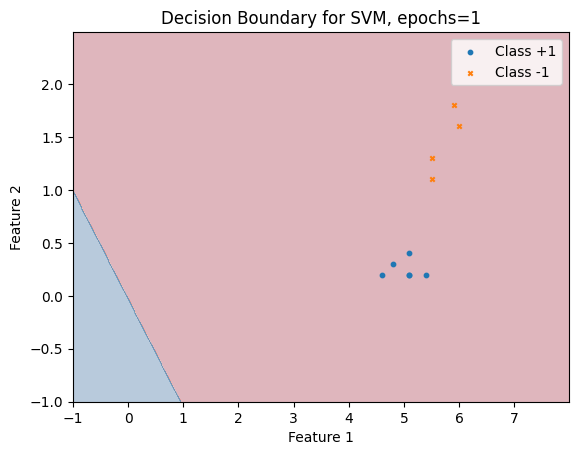

array([[46,  0],
       [44,  0]])

              precision    recall  f1-score   support

        -1.0       0.51      1.00      0.68        46
         1.0       0.00      0.00      0.00        44

    accuracy                           0.51        90
   macro avg       0.26      0.50      0.34        90
weighted avg       0.26      0.51      0.35        90

              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57         4
         1.0       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [48]:
svm(
  X=train_data['x'],
  y=train_data['y'],
  X_test=test_data['x'],
  y_test=test_data['y'],
  alpha=0.005,
  epochs=1
)

Epoch #, Loss 
 ------------------------
0, 0.9277190868802407
1, 0.8790936066554013

 Trained Parameters
theta: [-0.11793847 -0.26199728]
b: [0.02369675]
train preds: [-0.7271517  -0.59480736 -1.01012464 -0.67736428 -0.93936156 -0.61839505
 -1.14508103 -1.21188636 -0.56860763 -0.71796989]
mapped train preds: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
train labels y: [ 1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]
X_test: [[6.  1.6]
 [5.5 1.3]
 [5.9 1.8]
 [4.8 0.3]
 [5.1 0.4]
 [5.1 0.2]
 [4.6 0.2]
 [5.5 1.1]
 [5.4 0.2]
 [5.1 0.2]]
test preds: [-1.10312971 -0.96556129 -1.14373531 -0.62100708 -0.68258835 -0.6301889
 -0.57121966 -0.91316183 -0.66557044 -0.6301889 ]
mapped test preds: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
test labels y_test: [-1. -1. -1.  1.  1.  1.  1. -1.  1.  1.] 



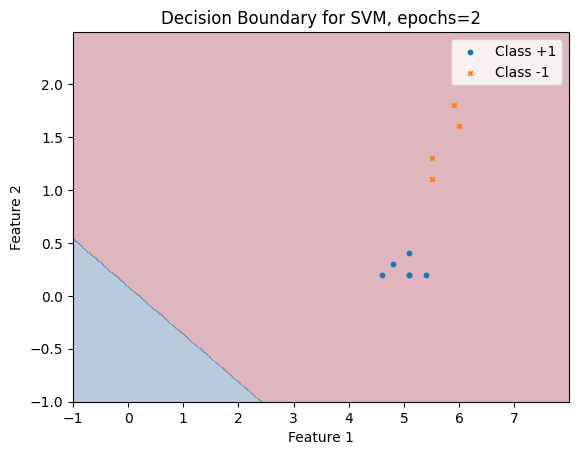

array([[46,  0],
       [44,  0]])

              precision    recall  f1-score   support

        -1.0       0.51      1.00      0.68        46
         1.0       0.00      0.00      0.00        44

    accuracy                           0.51        90
   macro avg       0.26      0.50      0.34        90
weighted avg       0.26      0.51      0.35        90

              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57         4
         1.0       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [49]:
svm(
  X=train_data['x'],
  y=train_data['y'],
  X_test=test_data['x'],
  y_test=test_data['y'],
  alpha=0.005,
  epochs=2
)

Epoch #, Loss 
 ------------------------
0, 0.9111367178468078
1, 0.8708964155981844
2, 0.8277994929920076

 Trained Parameters
theta: [-0.10152816 -0.37956548]
b: [0.04831884]
train preds: [-0.6442613  -0.51492941 -1.02648149 -0.58599912 -0.9655646  -0.53523504
 -1.1734643  -1.27718113 -0.47697286 -0.6517594 ]
mapped train preds: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
train labels y: [ 1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]
X_test: [[6.  1.6]
 [5.5 1.3]
 [5.9 1.8]
 [4.8 0.3]
 [5.1 0.4]
 [5.1 0.2]
 [4.6 0.2]
 [5.5 1.1]
 [5.4 0.2]
 [5.1 0.2]]
test preds: [-1.16815487 -1.00352115 -1.23391515 -0.55288595 -0.62130095 -0.54538785
 -0.49462377 -0.92760805 -0.5758463  -0.54538785]
mapped test preds: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
test labels y_test: [-1. -1. -1.  1.  1.  1.  1. -1.  1.  1.] 



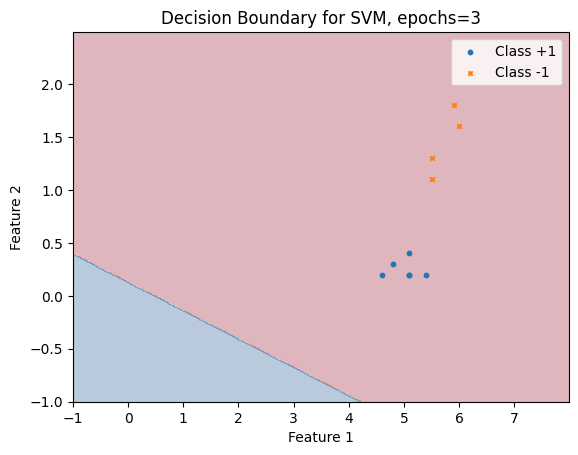

array([[46,  0],
       [44,  0]])

              precision    recall  f1-score   support

        -1.0       0.51      1.00      0.68        46
         1.0       0.00      0.00      0.00        44

    accuracy                           0.51        90
   macro avg       0.26      0.50      0.34        90
weighted avg       0.26      0.51      0.35        90

              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57         4
         1.0       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [50]:
svm(
  X=train_data['x'],
  y=train_data['y'],
  X_test=test_data['x'],
  y_test=test_data['y'],
  alpha=0.005,
  epochs=3
)

Epoch #, Loss 
 ------------------------
0, 0.9126962464718631
1, 0.8628262557613918
2, 0.8087522610442133
3, 0.7645220352886141
4, 0.7116388333688725

 Trained Parameters
theta: [-0.08306704 -0.61641617]
b: [0.09427582]
train preds: [-0.56413117 -0.42772921 -1.15213254 -0.48587614 -1.10229232 -0.44434262
 -1.3335627  -1.51018085 -0.3660876  -0.60085267]
mapped train preds: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
train labels y: [ 1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]
X_test: [[6.  1.6]
 [5.5 1.3]
 [5.9 1.8]
 [4.8 0.3]
 [5.1 0.4]
 [5.1 0.2]
 [4.6 0.2]
 [5.5 1.1]
 [5.4 0.2]
 [5.1 0.2]]
test preds: [-1.3903923  -1.16393393 -1.50536884 -0.48937083 -0.57593256 -0.45264933
 -0.41111581 -1.0406507  -0.47756944 -0.45264933]
mapped test preds: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
test labels y_test: [-1. -1. -1.  1.  1.  1.  1. -1.  1.  1.] 



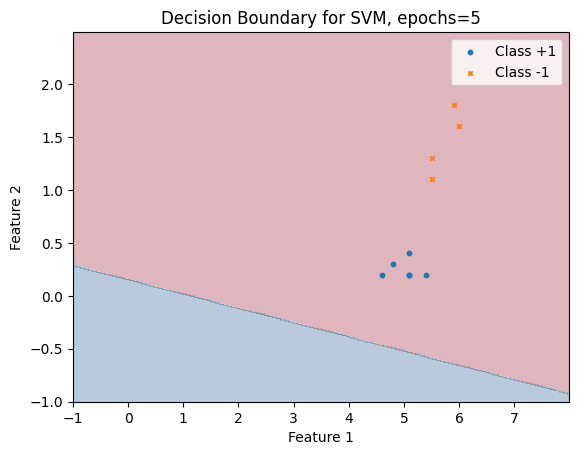

array([[46,  0],
       [44,  0]])

              precision    recall  f1-score   support

        -1.0       0.51      1.00      0.68        46
         1.0       0.00      0.00      0.00        44

    accuracy                           0.51        90
   macro avg       0.26      0.50      0.34        90
weighted avg       0.26      0.51      0.35        90

              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57         4
         1.0       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [51]:
svm(
  X=train_data['x'],
  y=train_data['y'],
  X_test=test_data['x'],
  y_test=test_data['y'],
  alpha=0.005,
  epochs=5
)

Epoch #, Loss 
 ------------------------
0, 0.9139231849307634
1, 0.8555889313139923
2, 0.7924696105092148
3, 0.7325704820983577
4, 0.6655303698508265
5, 0.6067622266239773
6, 0.5575872268590895
7, 0.5338285571900965
8, 0.4933384771977942
9, 0.4538328923470436

 Trained Parameters
theta: [ 0.00825047 -1.15735347]
b: [0.20860394]
train preds: [-0.09157441  0.01673551 -1.12989234  0.02251085 -1.13484262  0.01838561
 -1.3555877  -1.70361879  0.13247086 -0.2097849 ]
mapped train preds: [-1.  1. -1.  1. -1.  1. -1. -1.  1. -1.]
train labels y: [ 1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]
X_test: [[6.  1.6]
 [5.5 1.3]
 [5.9 1.8]
 [4.8 0.3]
 [5.1 0.4]
 [5.1 0.2]
 [4.6 0.2]
 [5.5 1.1]
 [5.4 0.2]
 [5.1 0.2]]
test preds: [-1.59365877 -1.25057797 -1.82595451 -0.09899983 -0.21226004  0.01921066
  0.01508542 -1.01910728  0.0216858   0.01921066]
mapped test preds: [-1. -1. -1. -1. -1.  1.  1. -1.  1.  1.]
test labels y_test: [-1. -1. -1.  1.  1.  1.  1. -1.  1.  1.] 



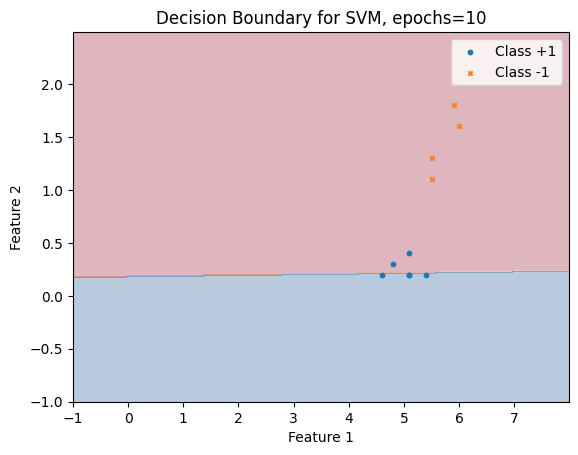

array([[46,  0],
       [14, 30]])

              precision    recall  f1-score   support

        -1.0       0.77      1.00      0.87        46
         1.0       1.00      0.68      0.81        44

    accuracy                           0.84        90
   macro avg       0.88      0.84      0.84        90
weighted avg       0.88      0.84      0.84        90

              precision    recall  f1-score   support

        -1.0       0.67      1.00      0.80         4
         1.0       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



In [52]:
svm(
  X=train_data['x'],
  y=train_data['y'],
  X_test=test_data['x'],
  y_test=test_data['y'],
  alpha=0.005,
  epochs=10
)

Epoch #, Loss 
 ------------------------
0, 0.9143435064576685
1, 0.8530031384738166
2, 0.7867618845705222
3, 0.7212490780632477
4, 0.6482971997917426
5, 0.5830566680328603
6, 0.5355868389221555
7, 0.4835212630619314
8, 0.43265389513406044
9, 0.3920046107987097
10, 0.3601854714906023
11, 0.32472313890309434
12, 0.30268387722160567
13, 0.2821935463180663
14, 0.2612803277956728

 Trained Parameters
theta: [ 0.10801606 -1.61013678]
b: [0.30751137]
train preds: [ 0.44016186  0.50396109 -0.96575482  0.57957233 -1.03056446  0.5255643
 -1.21217094 -1.70601358  0.66497476  0.24674336]
mapped train preds: [ 1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]
train labels y: [ 1.  1. -1.  1. -1.  1. -1. -1.  1.  1.]
X_test: [[6.  1.6]
 [5.5 1.3]
 [5.9 1.8]
 [4.8 0.3]
 [5.1 0.4]
 [5.1 0.2]
 [4.6 0.2]
 [5.5 1.1]
 [5.4 0.2]
 [5.1 0.2]]
test preds: [-1.62061114 -1.19157814 -1.9534401   0.34294741  0.21433855  0.5363659
  0.48235787 -0.86955078  0.56877072  0.5363659 ]
mapped test preds: [-1. -1. -1.  1.  1.  1.

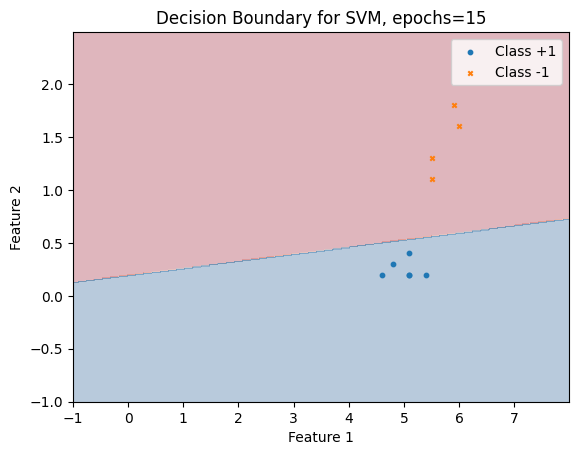

array([[46,  0],
       [ 1, 43]])

              precision    recall  f1-score   support

        -1.0       0.98      1.00      0.99        46
         1.0       1.00      0.98      0.99        44

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [53]:
svm(
  X=train_data['x'],
  y=train_data['y'],
  X_test=test_data['x'],
  y_test=test_data['y'],
  alpha=0.005,
  epochs=15
)

Epoch #, Loss 
 ------------------------
0, 0.9149417373097132
1, 0.849229673042355
2, 0.7774187103605374
3, 0.7038901380346175
4, 0.6183917979203583
5, 0.5331073659640724
6, 0.4656396063913502
7, 0.40503297162312707
8, 0.3471977873106558
9, 0.3024843797356249
10, 0.2581319081153195
11, 0.2219515207372267
12, 0.18187118941271535
13, 0.16175508423273827
14, 0.14747858490772753
15, 0.12977431611831775
16, 0.11724353535789936
17, 0.10760660845187883
18, 0.09776118162180453
19, 0.09596115354492844
20, 0.09144160057814028
21, 0.08929301267912447
22, 0.08726046680794725
23, 0.08649393364468365
24, 0.08667581347239205
25, 0.08398994190739793
26, 0.08657932110925325
27, 0.08172069065620331
28, 0.08437398714097265
29, 0.07953168734474104
30, 0.08224664079406403
31, 0.08124091165420773
32, 0.07643231504523353
33, 0.0792243608186849
34, 0.07891217590393823
35, 0.07848332578058284
36, 0.07552549035920413
37, 0.07669358905685154
38, 0.06962629015653567
39, 0.0770977090875954
40, 0.0769833648834546


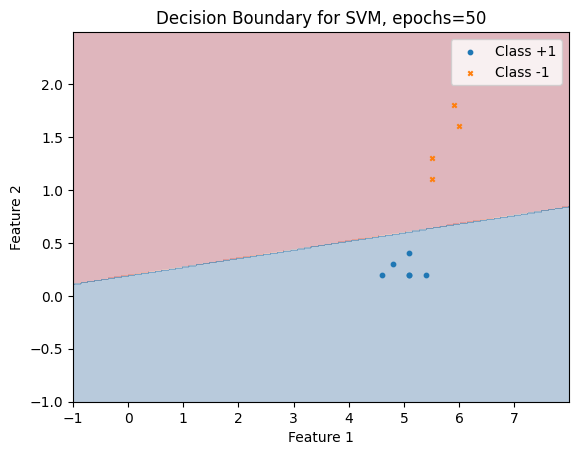

array([[46,  0],
       [ 1, 43]])

              precision    recall  f1-score   support

        -1.0       0.98      1.00      0.99        46
         1.0       1.00      0.98      0.99        44

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [54]:
svm(
  X=train_data['x'],
  y=train_data['y'],
  X_test=test_data['x'],
  y_test=test_data['y'],
  alpha=0.005,
  epochs=50
)